In [1]:
import pandas as pd

df = pd.read_csv("./test.csv", index_col = 0, parse_dates = ["data.obstime"])
df.head()

C:\Users\fabio\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,data.obstime,data.ref_area,data.title,data.obsvalue
1,2007-05-01,AT,loans to corporations of up to EUR 1M (new bus...,933.0
2,2007-06-01,AT,loans to corporations of up to EUR 1M (new bus...,1099.0
3,2007-07-01,AT,loans to corporations of up to EUR 1M (new bus...,1162.0
4,2007-08-01,AT,loans to corporations of up to EUR 1M (new bus...,884.0
5,2007-09-01,AT,loans to corporations of up to EUR 1M (new bus...,1005.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11922 entries, 1 to 11922
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data.obstime   11922 non-null  datetime64[ns]
 1   data.ref_area  11922 non-null  object        
 2   data.title     11922 non-null  object        
 3   data.obsvalue  11087 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 465.7+ KB


In [3]:
df.sort_values("data.obstime")

,data.obstime,data.ref_area,data.title,data.obsvalue
1737,2005-01-01,EE,loans to corporations of over EUR 1M (new busi...,NaN
3723,2005-01-01,IE,loans to corporations of over EUR 1M (new busi...,2927.0
1738,2005-02-01,EE,loans to corporations of over EUR 1M (new busi...,NaN
2523,2005-02-01,FI,loans to corporations of over EUR 1M (new busi...,1338.0
3724,2005-02-01,IE,loans to corporations of over EUR 1M (new busi...,1951.0
...,...,...,...,...
8922,2024-01-01,EE,HICP - Overall index,5.0
9522,2024-01-01,FR,HICP - Overall index,3.4
9122,2024-01-01,ES,HICP - Overall index,3.5
10922,2024-01-01,MT,HICP - Overall index,3.7


In [4]:
df["data.ref_area"].value_counts()

data.ref_area
AT    600
BE    600
SK    600
SI    600
PT    600
NL    600
MT    600
LV    600
LU    600
LT    600
IT    600
IE    600
GR    600
FR    600
FI    600
ES    600
DE    600
U2    600
EE    586
CY    536
Name: count, dtype: int64

In [5]:
df.groupby("data.ref_area").apply(lambda x: sum(x["data.obsvalue"].isna()))

C:\Users\fabio\AppData\Local\Temp\ipykernel_11532\2623076385.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("data.ref_area").apply(lambda x: sum(x["data.obsvalue"].isna()))


data.ref_area
AT      0
BE      0
CY     22
DE      0
EE     43
ES      0
FI      0
FR      0
GR    176
IE      0
IT      0
LT      0
LU    122
LV    244
MT    212
NL      0
PT      0
SI      0
SK     16
U2      0
dtype: int64

In [6]:
dict_ = df.groupby("data.ref_area")[["data.obsvalue"]].apply(lambda x: sum(x["data.obsvalue"].isna()) > 100)
countries_to_filter = [k for k, v in dict_.items() if v == True]
countries_to_filter
df_filtered = df[~df["data.ref_area"].isin(countries_to_filter)]
df_filtered["data.ref_area"].unique()

array(['AT', 'BE', 'CY', 'DE', 'EE', 'ES', 'FI', 'FR', 'IE', 'IT', 'LT',
       'NL', 'PT', 'SI', 'SK', 'U2'], dtype=object)

In [7]:
df_filtered["data.title"].unique()

array(['loans to corporations of up to EUR 1M (new business)',
       'loans to corporations of over EUR 1M (new business)',
       'HICP - Overall index'], dtype=object)

In [8]:
df_filtered.columns

Index(['data.obstime', 'data.ref_area', 'data.title', 'data.obsvalue'], dtype='object')

In [9]:
#df_filtered["total_loan"] =
var_ = ['loans to corporations of up to EUR 1M (new business)',
       'loans to corporations of over EUR 1M (new business)']
sum_loans = df_filtered.groupby(['data.obstime', 'data.ref_area']).apply(lambda x: x.loc[x['data.title'].isin(var_),['data.obsvalue']].sum()).reset_index()
sum_loans

C:\Users\fabio\AppData\Local\Temp\ipykernel_11532\2378887345.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sum_loans = df_filtered.groupby(['data.obstime', 'data.ref_area']).apply(lambda x: x.loc[x['data.title'].isin(var_),['data.obsvalue']].sum()).reset_index()


,data.obstime,data.ref_area,data.obsvalue
0,2005-01-01,EE,0.0
1,2005-01-01,IE,2927.0
2,2005-02-01,EE,0.0
3,2005-02-01,FI,1338.0
4,2005-02-01,IE,1951.0
...,...,...,...
3297,2024-01-01,NL,0.0
3298,2024-01-01,PT,0.0
3299,2024-01-01,SI,0.0
3300,2024-01-01,SK,0.0


In [10]:
sum_loans["data.title"] = "total_loans"
sum_loans.head()

,data.obstime,data.ref_area,data.obsvalue,data.title
0,2005-01-01,EE,0.0,total_loans
1,2005-01-01,IE,2927.0,total_loans
2,2005-02-01,EE,0.0,total_loans
3,2005-02-01,FI,1338.0,total_loans
4,2005-02-01,IE,1951.0,total_loans


In [11]:
df_filtered1 = pd.concat([df_filtered, sum_loans], axis = 0)
df_filtered1["data.title"].unique()

array(['loans to corporations of up to EUR 1M (new business)',
       'loans to corporations of over EUR 1M (new business)',
       'HICP - Overall index', 'total_loans'], dtype=object)

In [12]:
df_filtered1 = df_filtered1[df_filtered1["data.title"].isin(['HICP - Overall index', 'total_loans'])]

In [13]:
country = "IT"
df_filtered1 = df_filtered1[df_filtered1["data.ref_area"] == country]
data = df_filtered1[df_filtered1['data.title'] == 'HICP - Overall index']
#data["loans"] = df_filtered1[df_filtered1['data.title'] == 'total_loans', ['data.obsvalue']]
#df_filtered1.pivot(index=['data.obstime'], columns=['data.title'], values='data.obsvalue')
data = data.merge(df_filtered1[df_filtered1['data.title'] == 'total_loans'] , on = ["data.obstime", "data.ref_area"], how = "left", suffixes = ("_HICP", "_loans"))
data[["data.obsvalue_HICP", "data.obsvalue_loans"]].dropna().corr()

,data.obsvalue_HICP,data.obsvalue_loans
data.obsvalue_HICP,1.000000,0.116105
data.obsvalue_loans,0.116105,1.000000


In [14]:
data[["data.obsvalue_HICP", "data.obsvalue_loans"]].diff(1).corr()

,data.obsvalue_HICP,data.obsvalue_loans
data.obsvalue_HICP,1.000000,-0.011534
data.obsvalue_loans,-0.011534,1.000000


<Axes: >

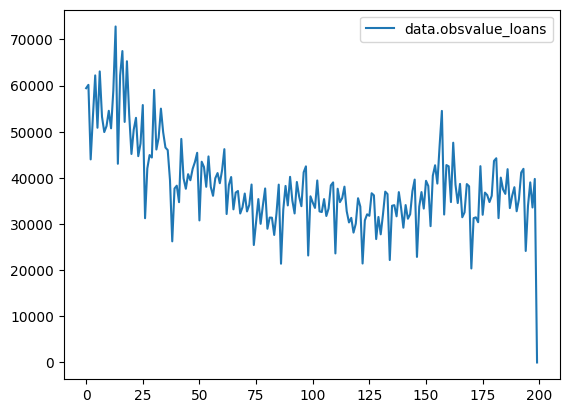

In [15]:
data[["data.obsvalue_loans"]].plot()

<Axes: >

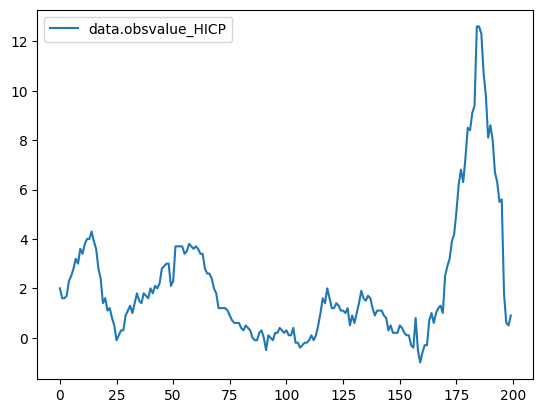

In [16]:
data[["data.obsvalue_HICP"]].plot()

# Correct exercise using pivot

In [17]:
import numpy as np

df = pd.read_csv("./test.csv", index_col = 0, parse_dates = ["data.obstime"])
df.sort_values("data.obstime")

,data.obstime,data.ref_area,data.title,data.obsvalue
1737,2005-01-01,EE,loans to corporations of over EUR 1M (new busi...,NaN
3723,2005-01-01,IE,loans to corporations of over EUR 1M (new busi...,2927.0
1738,2005-02-01,EE,loans to corporations of over EUR 1M (new busi...,NaN
2523,2005-02-01,FI,loans to corporations of over EUR 1M (new busi...,1338.0
3724,2005-02-01,IE,loans to corporations of over EUR 1M (new busi...,1951.0
...,...,...,...,...
8922,2024-01-01,EE,HICP - Overall index,5.0
9522,2024-01-01,FR,HICP - Overall index,3.4
9122,2024-01-01,ES,HICP - Overall index,3.5
10922,2024-01-01,MT,HICP - Overall index,3.7


In [18]:
############# REMOVE countries with more than 100 nans ###################

dict_ = df.groupby("data.ref_area").apply(lambda x: sum(x["data.obsvalue"].isna()) > 100)
countries_to_filter = [k for k, v in dict_.items() if v == True]
countries_to_filter
df_filtered = df[df["data.ref_area"].apply(lambda x: x not in countries_to_filter)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9522 entries, 1 to 11922
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data.obstime   9522 non-null   datetime64[ns]
 1   data.ref_area  9522 non-null   object        
 2   data.title     9522 non-null   object        
 3   data.obsvalue  9441 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 372.0+ KB


C:\Users\fabio\AppData\Local\Temp\ipykernel_11532\2789116445.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dict_ = df.groupby("data.ref_area").apply(lambda x: sum(x["data.obsvalue"].isna()) > 100)


In [19]:
#################### PIVOT Table to compute total loans for each date and country ##########################

df_filtered_pivot = df_filtered.pivot_table(index = ["data.obstime", "data.ref_area"], columns = ["data.title"], values = ["data.obsvalue"]).reset_index()
df_filtered_pivot.columns = ["obstime", "ref_area", "HICP", "loans1", "loans2"]
df_filtered_pivot["total_loans"] = df_filtered_pivot["loans1"] + df_filtered_pivot["loans2"]
df_filtered_pivot = df_filtered_pivot.drop(["loans1", "loans2"], axis = 1)

df_filtered_pivot.describe()

,obstime,HICP,total_loans
count,3280,3200.000000,3023.000000
mean,2015-06-25 17:52:05.853658624,2.434156,31241.725329
min,2005-01-01 00:00:00,-2.900000,52.000000
25%,2011-04-01 00:00:00,0.600000,915.730000
50%,2015-07-01 00:00:00,1.700000,8386.000000
75%,2019-10-01 00:00:00,3.200000,31097.500000
max,2024-01-01 00:00:00,25.200000,422182.200000
std,NaN,3.121567,61330.768317


In [20]:
#################### COMPUTE first differences to make series stationary ###########################

df_filtered_pivot[["HICP", "total_loans"]] = df_filtered_pivot[["HICP", "total_loans"]].diff(1)
df_filtered_pivot.columns = ['obstime', 'ref_area', 'HICP', 'total_loans_0']

vars_ = ["total_loans_0"]
for l in range(1, 10):
    vars_.append(f"total_loans_{l}")
    df_filtered_pivot[f"total_loans_{l}"] = df_filtered_pivot["total_loans_0"].shift(l)

In [21]:
#################### COMPUTE correlation at different lags ###########################
    
corrs = df_filtered_pivot.groupby(["ref_area"]).apply(lambda x: x[["HICP"] + vars_].corr().loc["HICP", vars_])
corrs

C:\Users\fabio\AppData\Local\Temp\ipykernel_11532\3896405440.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs = df_filtered_pivot.groupby(["ref_area"]).apply(lambda x: x[["HICP"] + vars_].corr().loc["HICP", vars_])


HICP,total_loans_0,total_loans_1,total_loans_2,total_loans_3,total_loans_4,total_loans_5,total_loans_6,total_loans_7,total_loans_8,total_loans_9
ref_area,,,,,,,,,,
AT,0.356863,-0.341917,0.465786,0.242184,0.097328,-0.268373,0.283064,-0.298388,-0.235968,0.130987
BE,0.214971,-0.140372,0.139579,-0.195626,-0.090034,-0.073933,0.094731,-0.117573,0.156092,0.028666
CY,-0.156272,0.238031,-0.267568,0.235691,-0.317413,-0.109755,0.069120,-0.016709,-0.194773,0.269486
DE,0.126125,0.427966,-0.486238,0.392956,-0.379307,0.515412,0.201765,-0.032751,-0.076154,0.349581
EE,-0.544472,0.156287,0.044497,-0.057567,-0.343833,0.307937,-0.087133,-0.024902,-0.283121,0.163885
ES,-0.114233,0.570511,-0.267195,-0.213224,0.205793,0.260245,-0.232861,-0.052213,-0.059319,0.304623
FI,0.008021,0.091924,0.064984,0.021269,-0.300381,0.205397,-0.007474,0.068948,-0.082834,-0.075239
FR,0.325040,0.276645,-0.336338,0.199794,0.184812,0.570765,-0.369523,0.223266,-0.241860,0.303055
IE,-0.208305,0.260885,0.123481,-0.312521,-0.266849,0.022664,0.349523,-0.356066,0.027601,-0.095608
